# TASK 1
## Stock Prediction using LSTM
## Author: *Avishek Choudhary*
<a href="https://www.linkedin.com/in/avishek-choudhary"> ![](https://img.shields.io/badge/LinkedIn-ffefdb?style=for-the-badge&logo=linkedin&logoColor=blue)</a> <a href="https://www.github.com/avishek-choudhary"> ![](https://img.shields.io/badge/Github-ffefdb?style=for-the-badge&logo=github&logoColor=black) </a>

This is a time series forecasting problem. It is an attempt to forecasting the data by understanding the previous data.

Stock data is a sequential data that is they need to be analysed according to the order by time. In Recurrent Neural Network RNN we are dealt with problem of vanishing gradient thus previous data will become less significant after long backpropagation. This means it's memory is not that deep.

Long short term memory (LSTM) is a model that increases the memory of recurrent neural networks. Recurrent neural networks hold short term memory in that they allow earlier determining information to be employed in the current neural networks. For immediate tasks, the earlier data is used. We may not possess a list of all of the earlier information for the neural node. In RNNs, LSTMs are very widely used in Neural networks. So we use Long short term memory LSTM. This is because stock prediction need long term memory.

**Table of Contents:**

- [Problem Statement](#1)
- [Data Collection](#2)
- [Data Exploration](#3)
- [Data Pre-processing](#4)
- [Creating a stacked LSTM model](#5)
- [Prediction and plot of the test data](#6)
- [Forecast for 30 days](#7)

### 1. Problem Statement <a id="1"></a>
Take stock price of any company and predicts its price by using LSTM.



---

### 2. Data Collection <a id="2"></a>
Here I'm using Tata Motors (TTM) stocks data.

Collecting data from Tiingo.com using it's API.

In [98]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import sklearn

In [ ]:
df = pdr.get_data_tiingo('TTM', api_key = key)        #'key' store the API-key [!deleted]
df.to_csv('TTM.csv')                                  #saving the data to CSV file



---

### 3. Data Exploration <a id="3"></a>

In [100]:
df = pd.read_csv('TTM.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TTM,2018-10-01 00:00:00+00:00,15.57,15.76,15.50,15.68,1261243,15.57,15.76,15.50,15.68,1261243,0.0,1.0
1,TTM,2018-10-02 00:00:00+00:00,15.52,15.70,15.43,15.65,1118683,15.52,15.70,15.43,15.65,1118683,0.0,1.0
2,TTM,2018-10-03 00:00:00+00:00,15.38,15.58,15.33,15.50,917886,15.38,15.58,15.33,15.50,917886,0.0,1.0
3,TTM,2018-10-04 00:00:00+00:00,14.93,15.26,14.82,15.26,1977704,14.93,15.26,14.82,15.26,1977704,0.0,1.0
4,TTM,2018-10-05 00:00:00+00:00,14.52,14.70,14.23,14.70,2157804,14.52,14.70,14.23,14.70,2157804,0.0,1.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1162 non-null   object 
 1   date         1162 non-null   object 
 2   close        1162 non-null   float64
 3   high         1162 non-null   float64
 4   low          1162 non-null   float64
 5   open         1162 non-null   float64
 6   volume       1162 non-null   int64  
 7   adjClose     1162 non-null   float64
 8   adjHigh      1162 non-null   float64
 9   adjLow       1162 non-null   float64
 10  adjOpen      1162 non-null   float64
 11  adjVolume    1162 non-null   int64  
 12  divCash      1162 non-null   float64
 13  splitFactor  1162 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 127.2+ KB


The dataset contains 14 columns associated with time series like the date and the different variables like close, high, low and volume.

We will use **close** column values for our experimentation of time series with LSTM.

In [102]:
df = pd.read_csv('TTM.csv', parse_dates=True, index_col='date')
df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2018-10-01 00:00:00+00:00,TTM,15.57,15.76,15.50,15.68,1261243,15.57,15.76,15.50,15.68,1261243,0.0,1.0
2018-10-02 00:00:00+00:00,TTM,15.52,15.70,15.43,15.65,1118683,15.52,15.70,15.43,15.65,1118683,0.0,1.0
2018-10-03 00:00:00+00:00,TTM,15.38,15.58,15.33,15.50,917886,15.38,15.58,15.33,15.50,917886,0.0,1.0
2018-10-04 00:00:00+00:00,TTM,14.93,15.26,14.82,15.26,1977704,14.93,15.26,14.82,15.26,1977704,0.0,1.0
2018-10-05 00:00:00+00:00,TTM,14.52,14.70,14.23,14.70,2157804,14.52,14.70,14.23,14.70,2157804,0.0,1.0


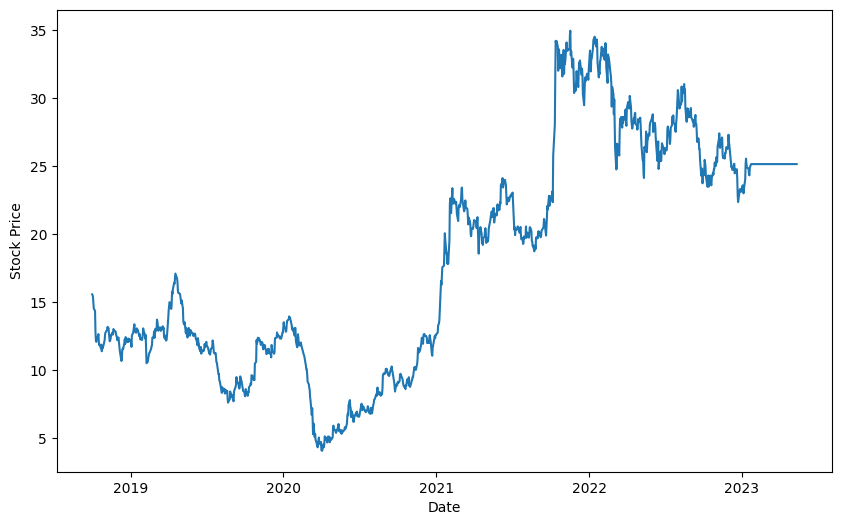

In [103]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(df['close'])

In [104]:
df_close = df['close']
df_close

date
2018-10-01 00:00:00+00:00    15.57
2018-10-02 00:00:00+00:00    15.52
2018-10-03 00:00:00+00:00    15.38
2018-10-04 00:00:00+00:00    14.93
2018-10-05 00:00:00+00:00    14.52
                             ...  
2023-05-08 00:00:00+00:00    25.14
2023-05-09 00:00:00+00:00    25.14
2023-05-10 00:00:00+00:00    25.14
2023-05-11 00:00:00+00:00    25.14
2023-05-12 00:00:00+00:00    25.14
Name: close, Length: 1162, dtype: float64

In [105]:
df_close.reset_index(drop = True, inplace = True)



---


### 4. Pre-processing the data <a id="4"></a>

LSTM are sensitive to the scale of the data. So we apply MinMax scaler. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale.

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))

In [107]:
df_close.shape

(1162, 1)

Splitting the dataset into Train and Test split

In [108]:
training_size = int(len(df_close) * 0.70)                   #training with 70% of data
test_size = len(df_close) - training_size                   #testing the remaining 30%

In [109]:
train_data = df_close[0:training_size,:]
test_data = df_close[training_size:len(df_close),:1]

In [110]:
#converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [111]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
xtrain, ytrain = create_dataset(train_data, time_step)
xtest, ytest = create_dataset(test_data, time_step)

In [112]:
xtrain.shape, ytrain.shape

((712, 100), (712,))

In [113]:
xtest.shape, ytest.shape

((248, 100), (248,))

In [114]:
#reshape the input to be [samples, time steps, features] which is required for LSTM
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

---

### 5. Creating the LSTM model <a id="5"></a>

In [115]:
#importing required libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [116]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 358ms/step - loss: 0.0684 - val_loss: 0.0066
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0125 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 4/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 7/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 8/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 9/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0025 - val_l

---

### 6. Predicting and plotting test data <a id="6"></a>

In [119]:
#predicting and checking performance metrics
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

8/8 [==============================] - 0s 42ms/step


In [120]:
#transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculating RMSE performance metrics

In [121]:
import math
from sklearn.metrics import mean_squared_error

In [122]:
#Train data RMSE
math.sqrt(mean_squared_error(ytrain, train_predict))

15.657481412975232

In [123]:
#Test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

25.206072971879532

In [124]:
#shifting train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shifting test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1,:] = test_predict

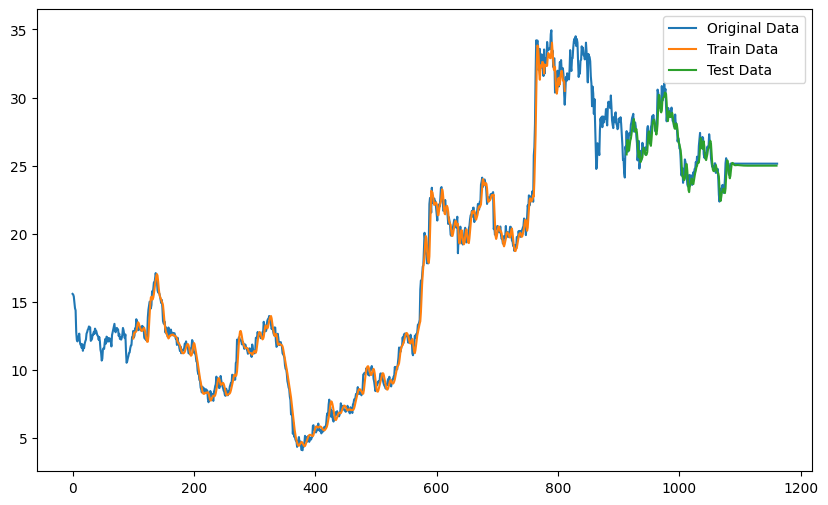

In [125]:
# plotting
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data', 'Train Data', 'Test Data'])
plt.show()

---

### 7. Forecasting the data for 30 days <a id="7"></a>

In [126]:
len(test_data)

349

In [127]:
xinput = test_data[len(test_data)-100:].reshape(1, -1)
xinput.shape

(1, 100)

In [128]:
#converting into list
temp_ip = list(xinput)
temp_ip = temp_ip[0].tolist()

In [129]:
temp_ip

[0.663642255346727,
 0.6701231367465976,
 0.6461438755670771,
 0.6085547634478289,
 0.5920285158781594,
 0.6215165262475697,
 0.6231367465975373,
 0.6198963058976021,
 0.6166558651976669,
 0.6318859364873622,
 0.6182760855476345,
 0.6127673363577446,
 0.6237848347375242,
 0.6464679196370706,
 0.6837329876863253,
 0.695398574206092,
 0.6824368114063513,
 0.6749837977965003,
 0.671095268956578,
 0.6584575502268308,
 0.6555411535968891,
 0.6740116655865197,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063513,
 0.6824368114063

In [130]:
#forecasting data for 30 days
output=[]
n_steps = 100
i = 0
while(i<30):

    if(len(temp_ip)>100):
        #print(temp_ip)
        xinput = np.array(temp_ip[1:])
        print("{} day input {}".format(i,xinput))
        xinput = xinput.reshape(1,-1)
        xinput = xinput.reshape((1, n_steps, 1))
        #print(xinput)
        yhat = model.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        #print(temp_ip)
        output.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, n_steps,1))
        yhat = model.predict(xinput, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        output.extend(yhat.tolist())
        i = i+1

print(output)

[0.6777132]
101
1 day input [0.67012314 0.64614388 0.60855476 0.59202852 0.62151653 0.62313675
 0.61989631 0.61665587 0.63188594 0.61827609 0.61276734 0.62378483
 0.64646792 0.68373299 0.69539857 0.68243681 0.6749838  0.67109527
 0.65845755 0.65554115 0.67401167 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681 0.68243681
 0.68243681 0.68243681 0.68243681 

In [131]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [132]:
len(df_close)

1162

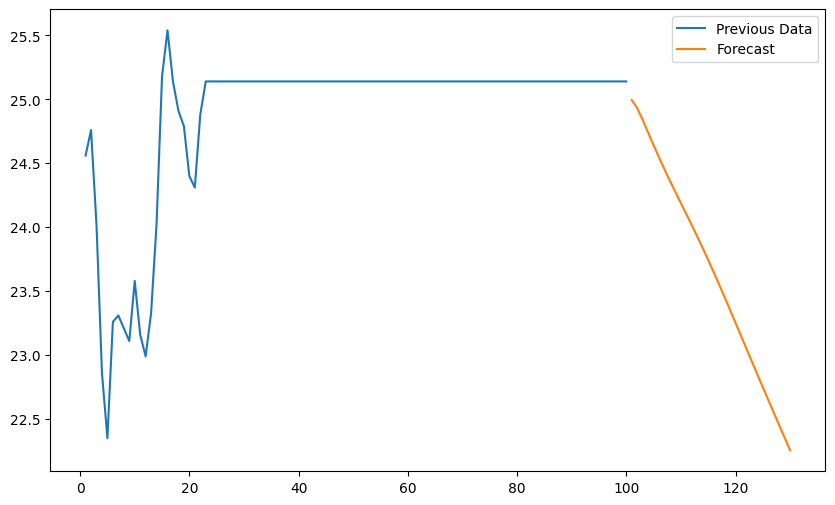

In [133]:
plt.figure(figsize=(10,6))
plt.plot(day_new, scaler.inverse_transform(df_close[len(df_close)-100:]))
plt.plot(day_pred, scaler.inverse_transform(output))
plt.legend(['Previous Data', 'Forecast'])

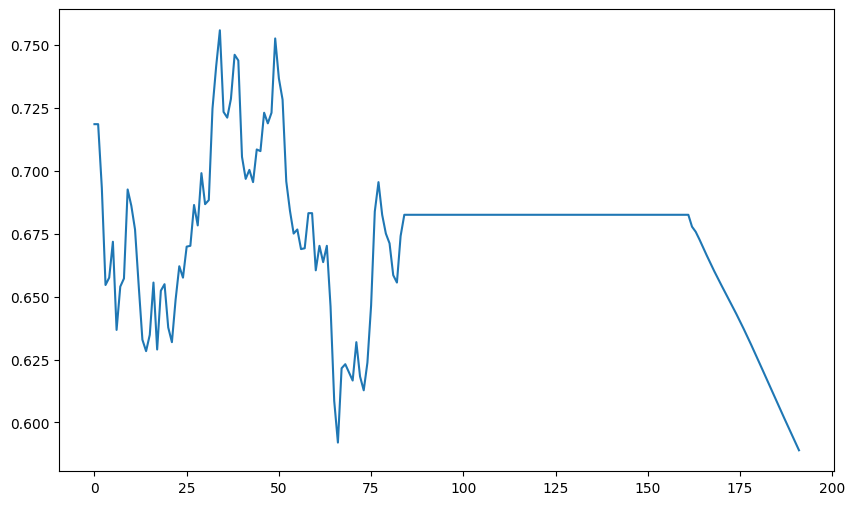

In [134]:
df_new = df_close.tolist()
df_new.extend(output)
plt.figure(figsize=(10,6))
plt.plot(df_new[1000:])

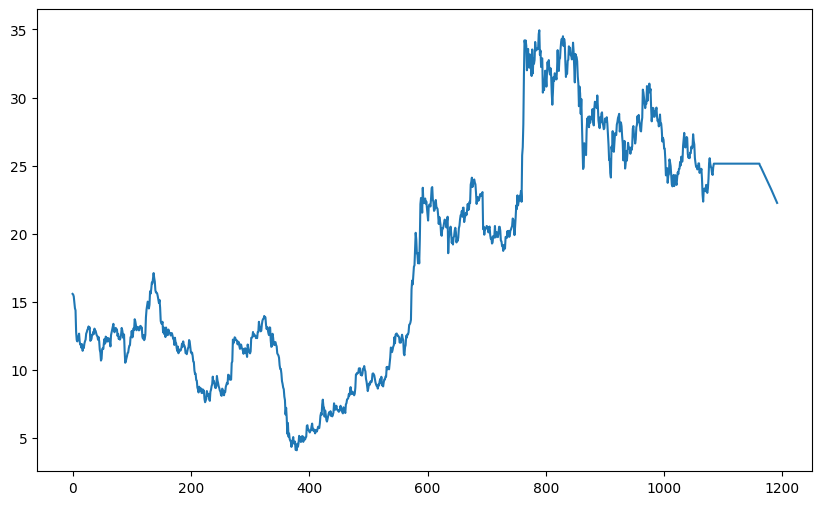

In [135]:
df_new = scaler.inverse_transform(df_new).tolist()
plt.figure(figsize=(10,6))
plt.plot(df_new)

---